# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 610


#### Note to Central Grader:
This part of the code is given by the starter file, but you mentioned that the the expected output for cities is 611 as per Feb 14 at 10:43pm feedback. However the list is based on random, and Part 1 WeatherPy's instruction only say "over 500 cities". 
I tried re-generating for a few times, and the closest I could get is 610.

Would that be sufficient?

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [59]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | baukau
Processing Record 3 of Set 1 | itapuranga
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | miquelon
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | tinajo
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | chonchi
Processing Record 13 of Set 1 | palmer
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | vernon
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | kabansk
Processing Record 21 of Set 1 | arar
Processing Record 22 of Set 1 | san patricio
Processing Record 23

In [62]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,0.93,94,75,13.38,CA,1708097402
1,baukau,51.5526,7.2042,13.92,93,100,2.63,DE,1708097677
2,itapuranga,-15.5622,-49.9486,28.23,62,92,1.16,BR,1708097677
3,waitangi,-43.9535,-176.5597,15.46,92,77,0.89,NZ,1708097677
4,miquelon,47.0975,-56.3814,-1.00,77,100,13.66,PM,1708097677


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,0.93,94,75,13.38,CA,1708097402
1,baukau,51.5526,7.2042,13.92,93,100,2.63,DE,1708097677
2,itapuranga,-15.5622,-49.9486,28.23,62,92,1.16,BR,1708097677
3,waitangi,-43.9535,-176.5597,15.46,92,77,0.89,NZ,1708097677
4,miquelon,47.0975,-56.3814,-1.00,77,100,13.66,PM,1708097677


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

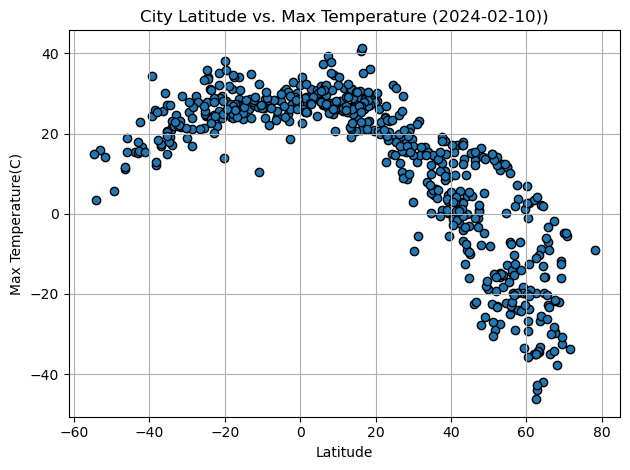

In [66]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (2024-02-10))")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

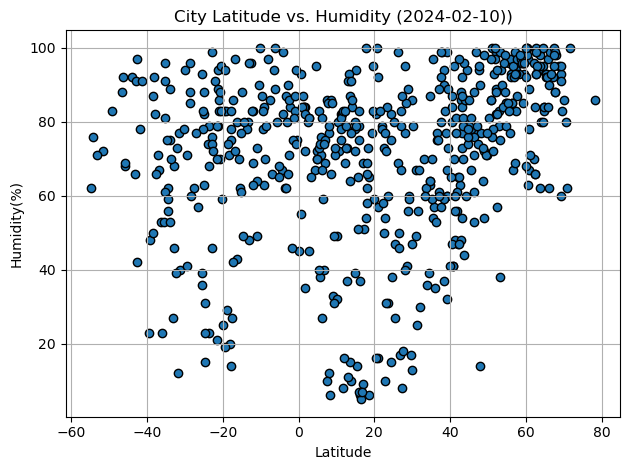

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2024-02-10))")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

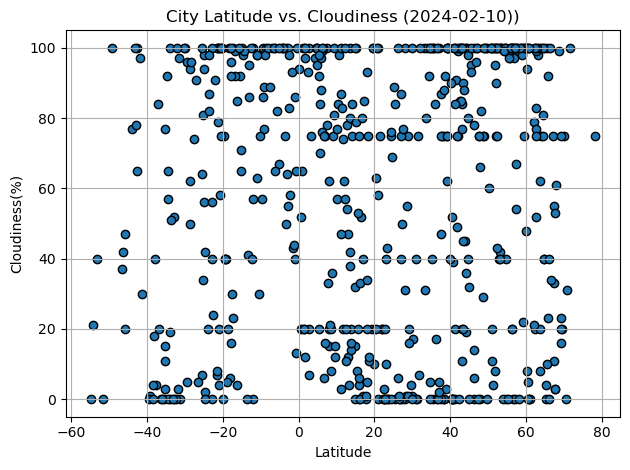

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2024-02-10))")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

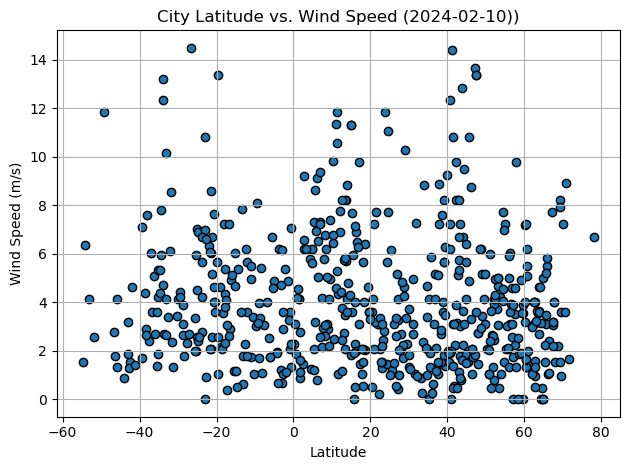

In [69]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2024-02-10))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Define a function to create Linear Regression plots

# Usage: to create linear regression plots based on 
    # the latitude (x),
    # a variable of interest (y), 
    # and a region (z) specified as either "south" or "north"

# y = the dependent variable, the variable that we are interested in studying and analyzing in relation to latitude (the independent variable)
# y is plaotted on the y-axis of the scatter plot

# The Function

def linerWeather(x,y,z):
    if z == "south":
        xy = southern_hemi_df
    else:
        xy = northern_hemi_df

     # Extract latitude and the variable of interest from the specified hemisphere data
    X_value = xy[x]
    Y_value = xy[y]

    # Calculate linear regression parameters
    (slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
    print(f"The r-value is: {rvalue}")

    # Create a string representation of the linear regression equation
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    # Calculate the predicted values based on the linear regression model
    regress_values = X_value * slope + intercept
    
    plt.scatter(X_value, Y_value)
    plt.plot(X_value, regress_values, "r-")
    plt.annotate(line_eq, (X_value.min() + 20, Y_value.min() + 10), fontsize=15, color="red") 

    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()


In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,0.93,94,75,13.38,CA,1708097402
1,baukau,51.5526,7.2042,13.92,93,100,2.63,DE,1708097677
4,miquelon,47.0975,-56.3814,-1.00,77,100,13.66,PM,1708097677
6,tinajo,29.0788,-13.7081,21.49,60,20,10.29,ES,1708097677
7,yellowknife,62.4560,-114.3525,-19.71,84,20,3.09,CA,1708097391


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,itapuranga,-15.5622,-49.9486,28.23,62,92,1.16,BR,1708097677
3,waitangi,-43.9535,-176.5597,15.46,92,77,0.89,NZ,1708097677
5,adamstown,-25.0660,-130.1015,24.27,82,98,2.56,PN,1708097677
11,chonchi,-42.6128,-73.8092,22.95,42,100,1.52,CL,1708097678
13,ancud,-41.8697,-73.8203,16.62,78,97,4.63,CL,1708097678


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.866560534582872


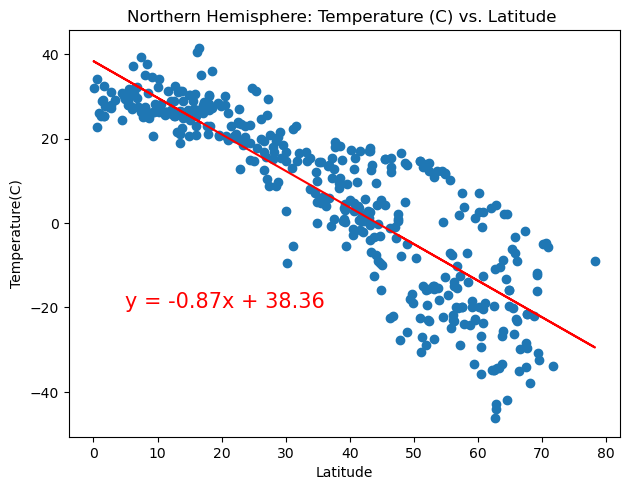

The r-value is: -0.866560534582872


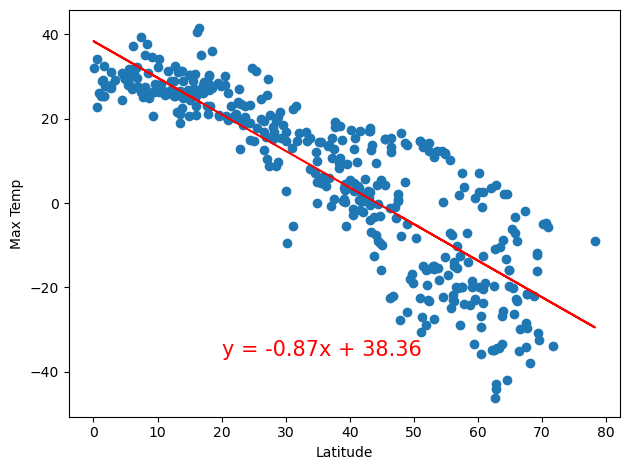

In [74]:
# Method 1 - Manual Coding - the linear regression analysis is performed directly within the script without using the function
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = northern_hemi_df["Lat"] * slope + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, ((5, -20)), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature(C)")
plt.tight_layout()
plt.title("Northern Hemisphere: Temperature (C) vs. Latitude ")

# Show plot
plt.show()

# Method 2 - Linear regression on Northern Hemisphere using the function
linerWeather("Lat","Max Temp","north")


The r-value is: 0.5914752990912838


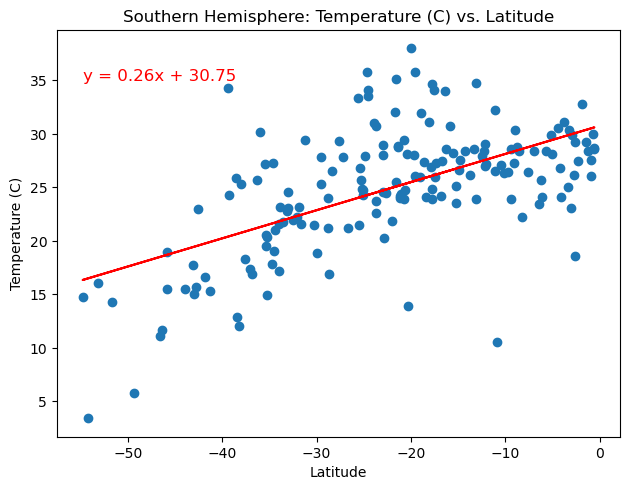

The r-value is: 0.5914752990912838


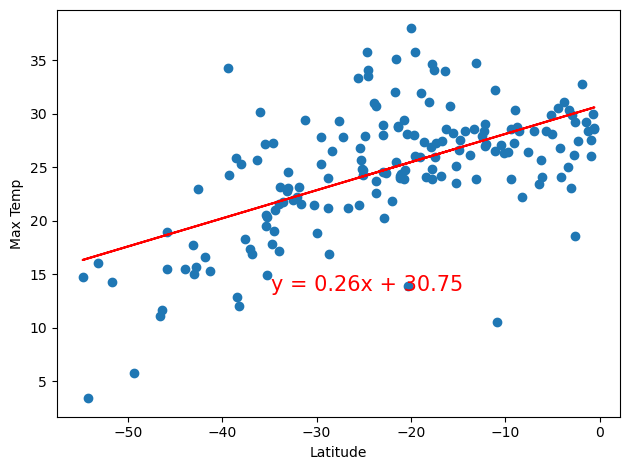

In [75]:
# Method 1 - Manual Coding - the linear regression analysis is performed directly within the script without using a function
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = southern_hemi_df["Lat"] * slope + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (southern_hemi_df["Lat"].min(), 35), fontsize=12, color="red")



# # Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.tight_layout()
plt.title("Southern Hemisphere: Temperature (C) vs. Latitude")

# # Show plot
plt.show()

# Method 2 - Linear regression on Southern Hemisphere using the function
linerWeather("Lat","Max Temp","south")


**Discussion about the linear relationship:** 
Northern Hemisphere Plot: As you move north from the equator (towards the North Pole), temperatures tend to get colder. So, the higher the latitude (farther north you go), the lower the temperature. The line we drew shows this relationship. It's like when you climb a mountain – it gets colder as you go higher up.

Southern Hemisphere Plot: On the flip side, as you move south from the equator (towards the South Pole), temperatures tend to get warmer. So, the higher the latitude (farther south you go), the higher the temperature. Again, the line we drew shows this pattern. It's like when you descend from a mountain – it gets warmer as you go down.

The r-value in Notrhern shows a high correlation between latitude and temperature. while the r-value in the Southern Hemisphere shows a moderate  correlation.

These plots help us understand how temperature changes with distance from the equator, which is important for understanding weather patterns around the world.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.42854842260236864


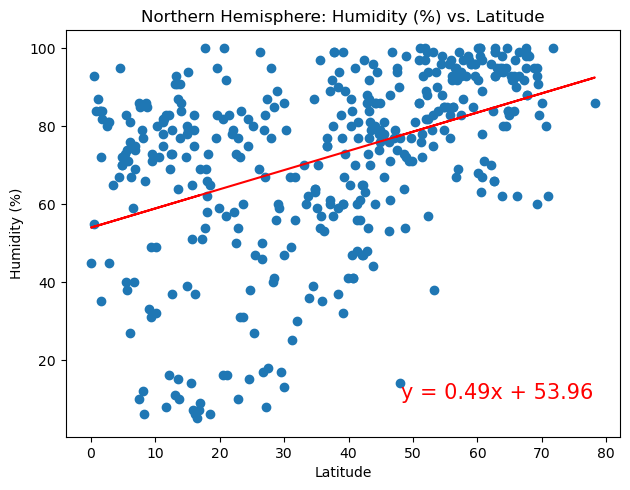

The r-value is: 0.42854842260236864


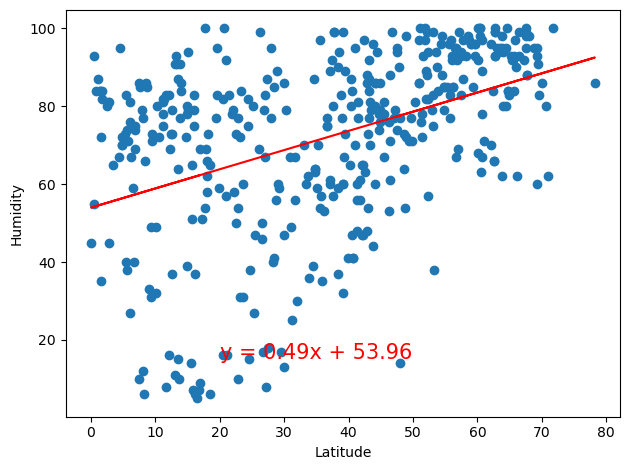

In [77]:
# Method 1 - Manual coding
# Northern Hemisphere
X_value = northern_hemi_df["Lat"]
Y_value = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value)
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-30,10), fontsize=15, color="red") 

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Northern Hemisphere using the function
linerWeather("Lat","Humidity","north")


The r-value is: 0.13988978474425753


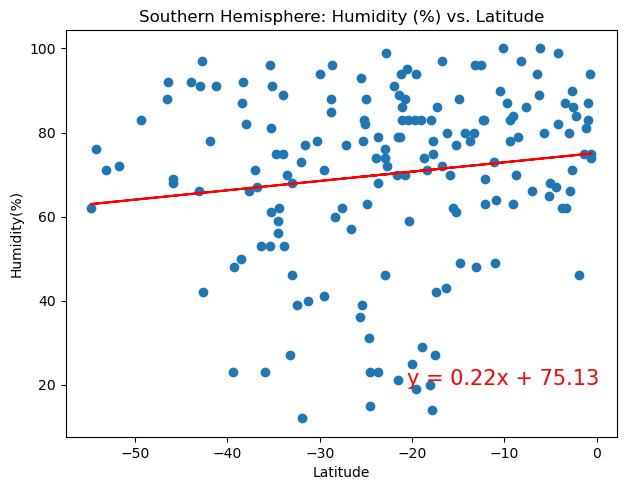

The r-value is: 0.13988978474425753


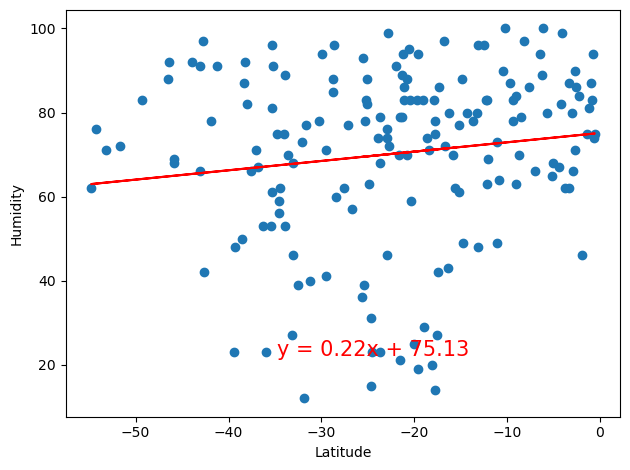

In [78]:
# Method 1 - Manual coding
# Southern Hemisphere
X_value = southern_hemi_df["Lat"]
Y_value = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value)
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-20,Y_value.min()+8), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
#plt.grid(True) 
plt.tight_layout()
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Southern Hemisphere using the function
linerWeather("Lat","Humidity","south")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the Northern Hemisphere, it shows as latitude goes up, humidity increases as well. r-value shows a moderate correlation between latitude and humidity.

In the Southern Hemisphere, it shows as latitude goes up, humidity increases. r-value shows a moderate to low correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10365972772502968


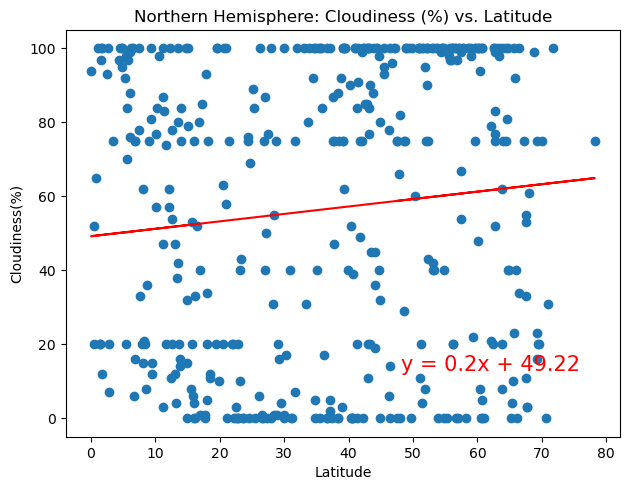

The r-value is: 0.10365972772502968


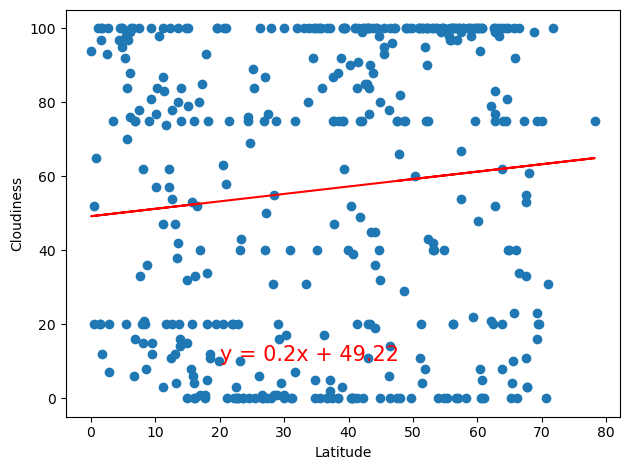

In [79]:
# Method 1 - Manual coding
# Northern Hemisphere
X_value = northern_hemi_df["Lat"]
Y_value = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value) 
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-30,13), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
# plt.grid(True) 
plt.tight_layout()
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Northern Hemisphere using the function
linerWeather("Lat","Cloudiness","north")

The r-value is: 0.3620502198590864


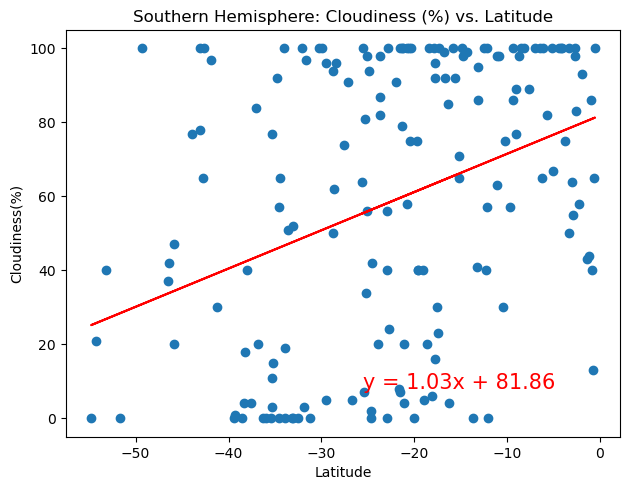

The r-value is: 0.3620502198590864


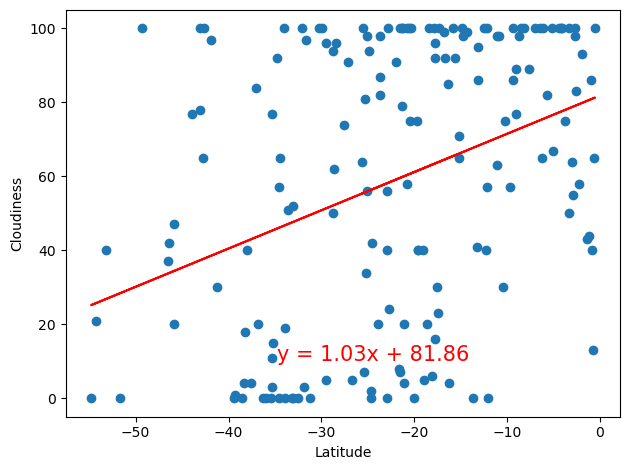

In [80]:
# Method 1 - Manual coding
# Southern Hemisphere
X_value = southern_hemi_df["Lat"]
Y_value = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value) #no need ,edgecolors="black"
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-25,Y_value.min()+8), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
# plt.grid(True) #no grid
plt.tight_layout()
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Southern Hemisphere using the function
linerWeather("Lat","Cloudiness","south")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, it shows as latitude goes up, cloudiness increases. r-value shows a moderate to low correlation between latitude and cloudiness.

In the Southern Hemisphere, it shows as latitude goes up, cloudiness increases. r-value shows a low correlation between latitude and cloudinss.



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.13975726043623787


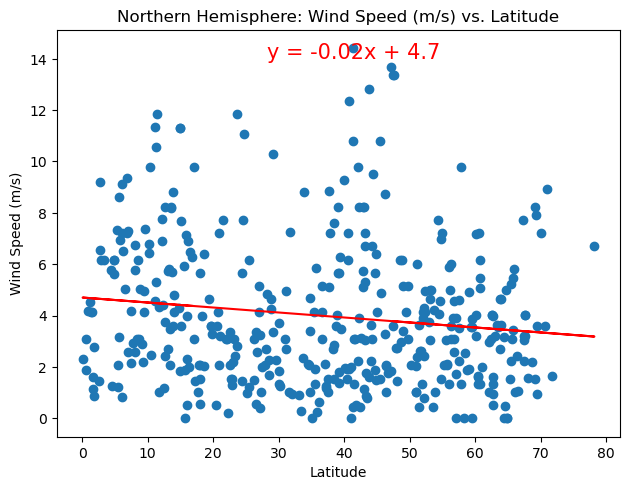

The r-value is: -0.13975726043623787


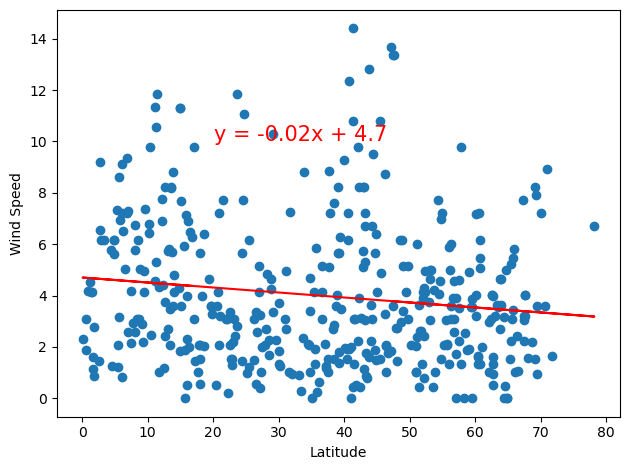

In [81]:
# Method 1 - Manual coding
# Northern Hemisphere
X_value = northern_hemi_df["Lat"]
Y_value = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value) #no need ,edgecolors="black"
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-50,14), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
#plt.grid(True) #no gridlines
plt.tight_layout()
plt.title("Northern Hemisphere: Wind Speed (m/s) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Northern Hemisphere using the function
linerWeather("Lat","Wind Speed","north")


The r-value is: -0.10590378013721126


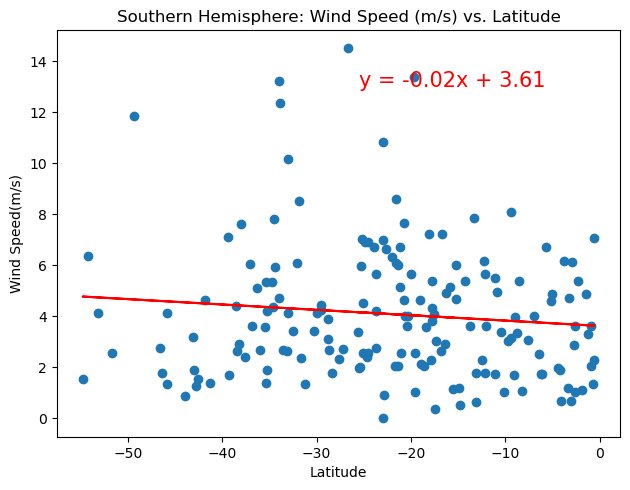

The r-value is: -0.10590378013721126


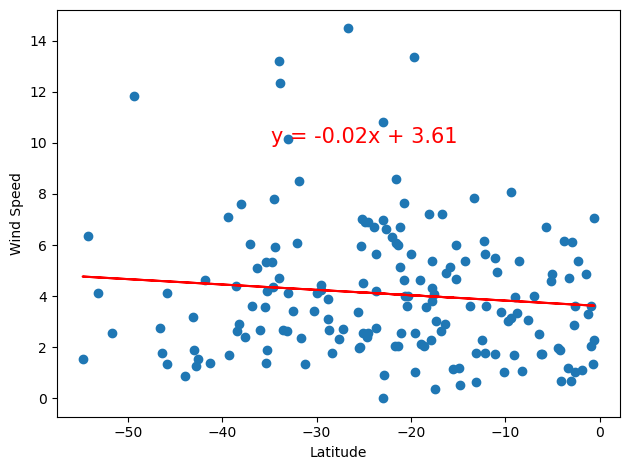

In [82]:
# Method 1 - Manual coding
# Southern Hemisphere
X_value = southern_hemi_df["Lat"]
Y_value = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value) #no need ,edgecolors="black"
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-25,13), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
# plt.grid(True) #no gridlines
plt.tight_layout()
plt.title("Southern Hemisphere: Wind Speed (m/s) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Southern Hemisphere using the function
linerWeather("Lat","Wind Speed","south")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, it shows that latitude does not affect wind speed. r-value shows almost no correlation between latitude and cloudiness.
In the Southern Hemisphere, it shows as latitude goes up, wind speed decreases. r-value shows a low correlation between latitude and wind speed.
